# The Streaming Services Dataset Observations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('movies.csv')

In [3]:
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [15]:
df['Age'].unique()

array(['13+', '18+', '7+', nan, 'all', '16+'], dtype=object)

In [4]:
movie_counts = df['Genres'].str.get_dummies(sep=',').apply(pd.value_counts, axis=0).iloc[1]
movie_counts

Action         2683
Adventure      1778
Animation       711
Biography       821
Comedy         4637
Crime          1833
Documentary    2546
Drama          7227
Family         1514
Fantasy        1089
Film-Noir        79
Game-Show         7
History         715
Horror         2201
Music           667
Musical         401
Mystery        1274
News            105
Reality-TV       22
Romance        2359
Sci-Fi         1228
Short           386
Sport           404
Talk-Show        19
Thriller       3354
War             539
Western         499
Name: 1, dtype: int64

In [5]:
genres = df['Genres'].str.get_dummies(',')

In [6]:
movies_with_genres = pd.concat([df,genres],axis=1)
movies_with_genres

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16740,16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,...,0,0,0,1,0,0,0,0,0,0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
movies_with_genres.to_csv('movies_with_genres')

## Count of Movies by Genre

<AxesSubplot:>

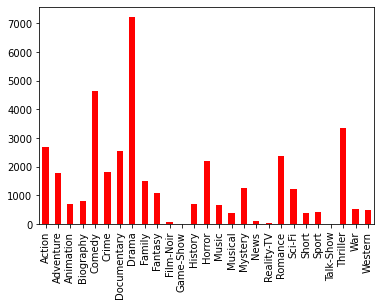

In [36]:
movie_counts.plot(kind='bar', colormap='autumn')

In [8]:
platforms = pd.DataFrame.from_dict({'Netflix' : [len(df.loc[df['Netflix'] == 1])], 'Hulu' : [len(df.loc[df['Hulu'] == 1])], 'Prime Video' : [len(df.loc[df['Prime Video'] == 1])], 'Disney+' : [len(df.loc[df['Disney+'] == 1])]})

In [9]:
platforms

,Netflix,Hulu,Prime Video,Disney+
0,3560,903,12354,564


## Count of movies by SVOD provider

<AxesSubplot:title={'center':'test'}, ylabel='0'>

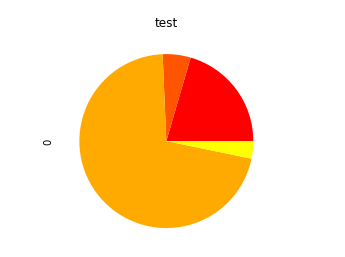

In [69]:
platforms.iloc[0].plot(kind='pie', colormap='autumn', autopct='%1.1f%%', textprops={'color':"white"}, pctdistance=1.2, labeldistance=1.5)

## Movie catalog averaged by decade and SVOD provider

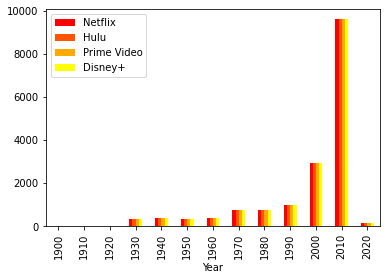

In [31]:
df.groupby(df['Year'] // 10 * 10).count()[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].plot(kind='bar', colormap='autumn')

## Linear Regression Analysis of directors versus IMDb score

### In the code below, we observe if the director(s) of a film impact the film's IMDb rating.

In [124]:
df

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [155]:
X = df[~df['IMDb'].isna()]['Directors'].dropna().values
y = df[~df['Directors'].isna()]['IMDb'].dropna().values

In [156]:
from sklearn.preprocessing import OneHotEncoder

In [157]:
X = X.reshape(-1,1)

In [158]:
enc = OneHotEncoder()

In [159]:
X = enc.fit_transform(X)

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [162]:
from sklearn.linear_model import LinearRegression

In [163]:
model = LinearRegression()

In [164]:
model.fit(X_train,y_train)

LinearRegression()

In [165]:
test_predictions = model.predict(X_test)

In [166]:
test_predictions

array([7.        , 6.3       , 5.88729442, ..., 5.88729442, 5.88729442,
       5.88729442])

In [167]:
y_test

array([5.5, 5.8, 6. , ..., 4.9, 4.7, 7.6])

In [168]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [169]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [170]:
MAE

1.0263891337309237

In [171]:
MSE

1.7286036446470585

In [172]:
RMSE

1.3147637219846988

In [173]:
test_residuals = y_test - test_predictions

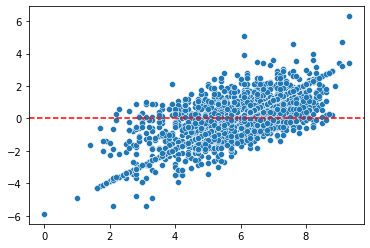

In [174]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='dashed')

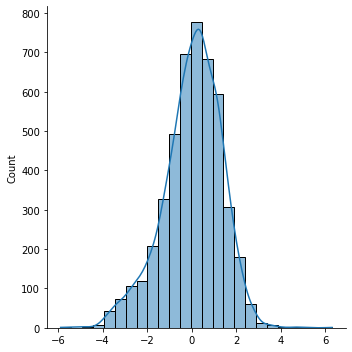

In [177]:
sns.displot(test_residuals, bins=25, kde=True)

In [94]:
from sklearn.neighbors import NearestNeighbors

In [27]:
t = [2014, 5.5, 1]
X = df[['Year', 'IMDb', 'Hulu']].dropna().values
X

array([[2010. ,    8.8,    0. ],
       [1999. ,    8.7,    0. ],
       [2018. ,    8.5,    0. ],
       ...,
       [2001. ,    4.7,    0. ],
       [2013. ,    5.7,    0. ],
       [2017. ,    6.6,    0. ]])

In [28]:
nbrs = NearestNeighbors(n_neighbors=5).fit(X)

In [29]:
print(nbrs.kneighbors([t]))

(array([[0. , 0.1, 0.1, 0.2, 0.2]]), array([[3883, 4018, 4103, 4234, 3850]]))


In [179]:
df.iloc[3883]

Unnamed: 0                                                      3883
ID                                                              3884
Title                                                     Downsizing
Year                                                            2017
Age                                                              18+
IMDb                                                             5.7
Rotten Tomatoes                                                  47%
Netflix                                                            0
Hulu                                                               1
Prime Video                                                        1
Disney+                                                            0
Type                                                               0
Directors                                            Alexander Payne
Genres                                                  Drama,Sci-Fi
Country                           

In [185]:
from tmdbv3api import TMDb, Movie
tmdb = TMDb()
tmdb.api_key = '704386f0c6876fad8a98fc244e60e2bc'

In [186]:
m = Movie()

In [187]:
search = m.search(df.iloc[3883]['Title'])

In [192]:
url = 'https://image.tmdb.org/t/p/original' + search[0].poster_path

In [193]:
url

'https://image.tmdb.org/t/p/original/uLlmtN33rMuimRq6bu0OoNzCGGs.jpg'